# Recrutamento preditivo

A empresa de tecnologia HighTech busca contratar os melhores profissionais do mercado para fazer parte do time e gerar valor para a empresa. A HighTech vem investindo muito nos últimos anos no uso de ciência de dados no setor do RH para trazer ganhos no processo de seleção e recrutamento. O time de ciência de dados junto com o time de RH vem realizando juntos um projeto de recrutamento preditivo.

O recrutamento preditivo é uma técnica de People Analytics para encontrar os melhores candidatos para contratação da empresa, na prática, o recrutamento preditivo aumenta as chances do recrutador potencializar o processo de seleção. Por meio da coleta e análise de dados, é possível avaliar o perfil e o fit cultural dos profissionais para entender se existe uma boa aderência à vaga.

**Problema de negócio:**

O objetivo da HighTech é identificar quais são os melhores indicadores para realizar o recrutamento de profissionais.

**Base de dados**

Este conjunto de dados consiste em algumas características como: percentual de ensino médio e superior e especialização, experiência de trabalho e ofertas salariais para os profissionais colocados.

**Desafio**

Você como cientista de dados do time de dados da HighTech tem o desafio de criar um modelo preditivo de recrutamento para prever como e quais são as melhores variáveis que podem colocar um profissional bem qualificado na HighTech.


**Importando a base de dados**

In [1]:
import pandas as pd

In [2]:
dados = pd.read_excel('Recrutamento.xlsx')

In [3]:
dados.shape

(215, 15)

In [4]:
dados.head()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Yes,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Yes,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Yes,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,No,NaN
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Yes,425000.0


**Inferência sobre a base de dados:**

Podemos observar que temos algumas variáveis como: gênero, desempenho educacional, score de desempenho educacional, status de contratação, salário.

**Variável Target:** No nosso case a target é a coluna status.

In [5]:
set(dados.status)

{'No', 'Yes'}

**Analisando os dados**

In [6]:
dados.describe()

,sl_no,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary
count,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,148.000000
mean,108.000000,67.303395,66.333163,66.370186,72.100558,62.278186,288655.405405
std,62.209324,10.827205,10.897509,7.358743,13.275956,5.833385,93457.452420
min,1.000000,40.890000,37.000000,50.000000,50.000000,51.210000,200000.000000
25%,54.500000,60.600000,60.900000,61.000000,60.000000,57.945000,240000.000000
50%,108.000000,67.000000,65.000000,66.000000,71.000000,62.000000,265000.000000
75%,161.500000,75.700000,73.000000,72.000000,83.500000,66.255000,300000.000000
max,215.000000,89.400000,97.700000,91.000000,98.000000,77.890000,940000.000000


Inferência sobre os dados:

Métricas de pontuação sobre ensino:
ssc_p
hsc_p
degree_p
estet_p
mba_p

sl_no é um código, então não faz sentido na análise.

salary vem após a contratação.



Observando valores nulos:

<Axes: >

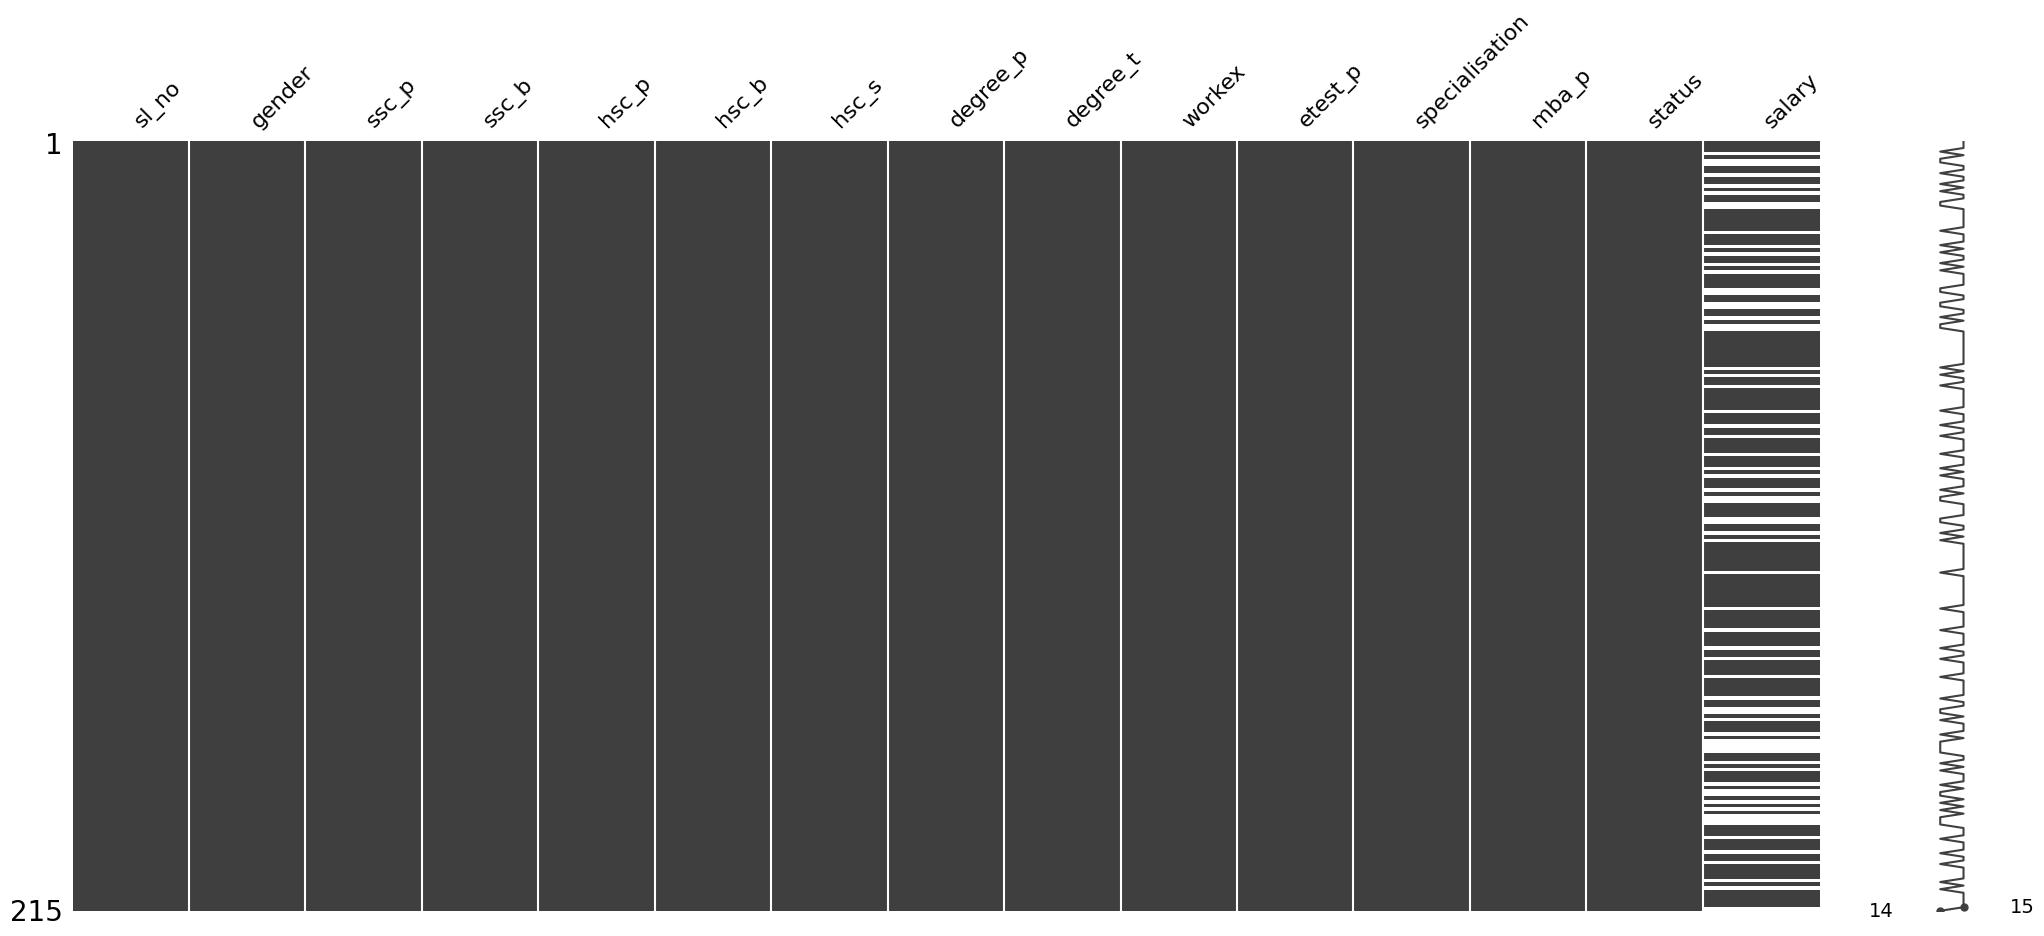

In [7]:
import missingno as msno
msno.matrix(dados)

In [8]:
dados.isnull().sum()

sl_no              0
gender             0
ssc_p              0
ssc_b              0
hsc_p              0
hsc_b              0
hsc_s              0
degree_p           0
degree_t           0
workex             0
etest_p            0
specialisation     0
mba_p              0
status             0
salary            67
dtype: int64

In [9]:
import seaborn as sb

<ipython-input-10-76a46ae56bb3>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sb.boxplot(x='status', y='salary', data=dados, palette='hls')


<Axes: xlabel='status', ylabel='salary'>

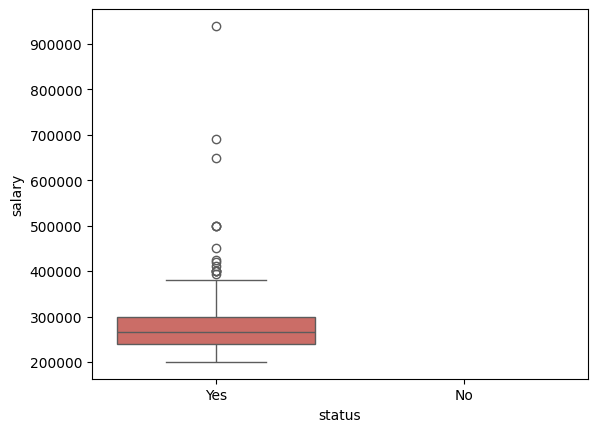

In [10]:
sb.boxplot(x='status', y='salary', data=dados, palette='hls')

Inferência sobre os dados:

Observe que para a variável salário, os valores nulos estão atribuídos a variável do tipo status quando o status é "não", ou seja, para os não contratados temos algumas pessoas da base sem salário atribuído.

Como podemos realizar a tratativa dos valores nulos?

In [11]:
dados['salary'].fillna(value=0, inplace=True)

In [12]:
dados.isnull().sum()

sl_no             0
gender            0
ssc_p             0
ssc_b             0
hsc_p             0
hsc_b             0
hsc_s             0
degree_p          0
degree_t          0
workex            0
etest_p           0
specialisation    0
mba_p             0
status            0
salary            0
dtype: int64

Analisando as variáveis numéricas:

Vamos analisar e compreender a distribuição dos dados para cada métrica de pontuação de ensino. Será que temos outliers na base?


<Axes: xlabel='hsc_p'>

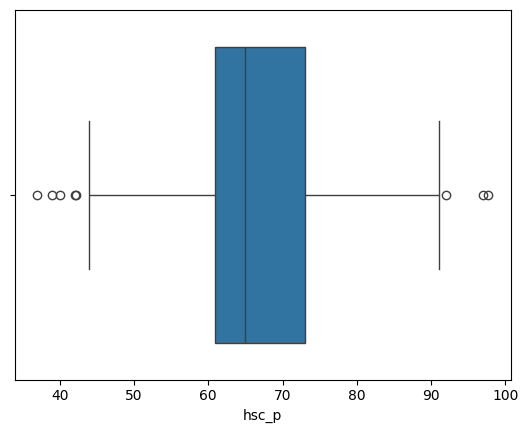

In [13]:
sb.boxplot(x=dados["hsc_p"])

<Axes: xlabel='hsc_p', ylabel='Count'>

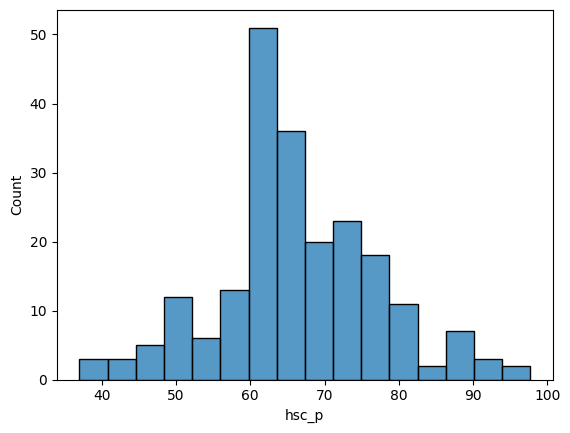

In [14]:
sb.histplot(data=dados, x="hsc_p")

<Axes: xlabel='degree_p'>

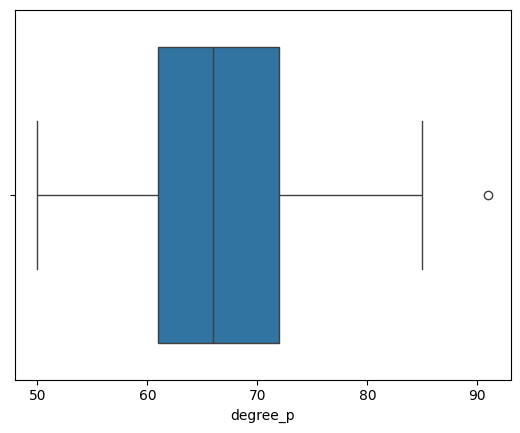

In [15]:
sb.boxplot(x=dados["degree_p"])

<Axes: xlabel='degree_p', ylabel='Count'>

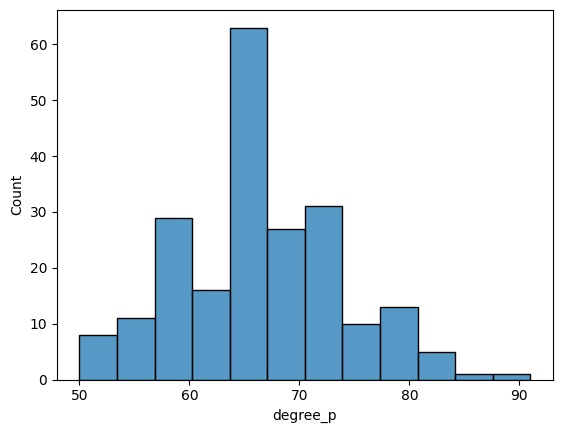

In [16]:
sb.histplot(data=dados, x="degree_p")

<Axes: xlabel='etest_p'>

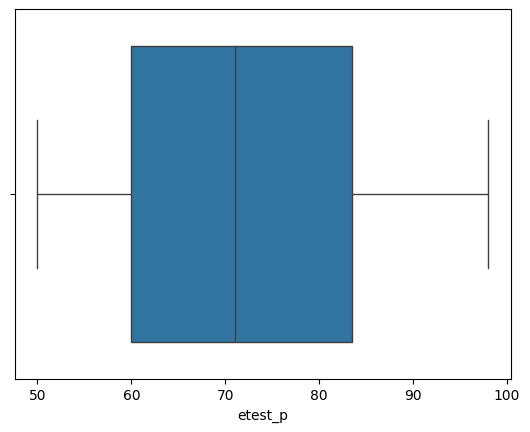

In [17]:
sb.boxplot(x=dados["etest_p"])

<Axes: xlabel='etest_p', ylabel='Count'>

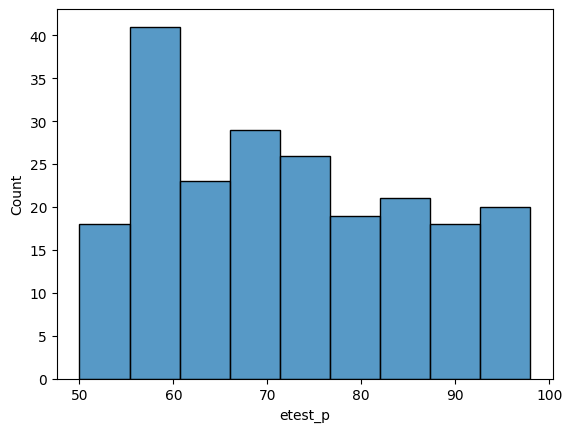

In [18]:
sb.histplot(data=dados, x="etest_p")

<Axes: xlabel='mba_p'>

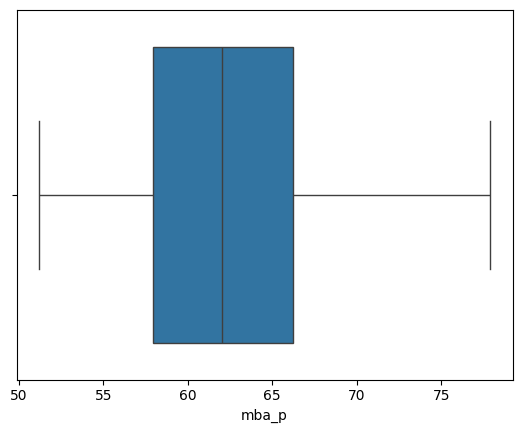

In [19]:
sb.boxplot(x=dados["mba_p"])

<Axes: xlabel='mba_p', ylabel='Count'>

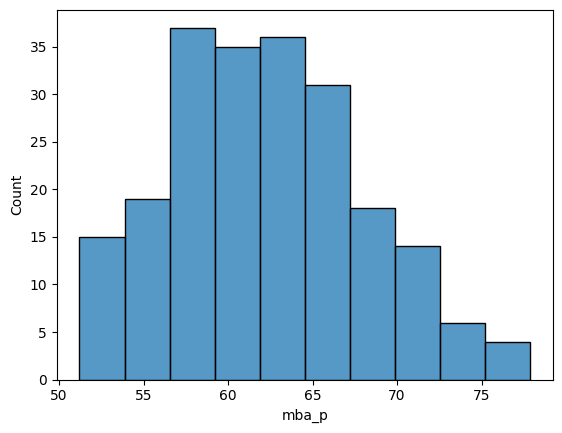

In [20]:
sb.histplot(data=dados, x="mba_p")

<Axes: xlabel='salary'>

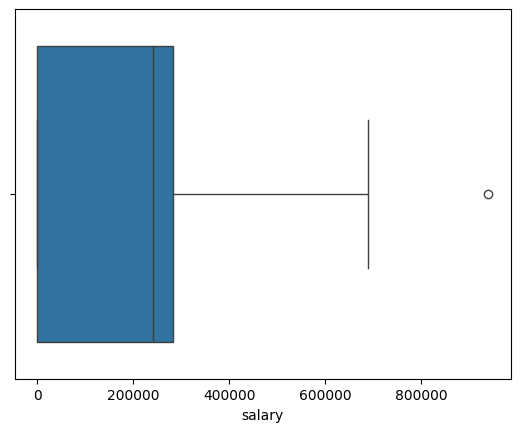

In [21]:
sb.boxplot(x=dados["salary"])

<Axes: xlabel='salary', ylabel='Count'>

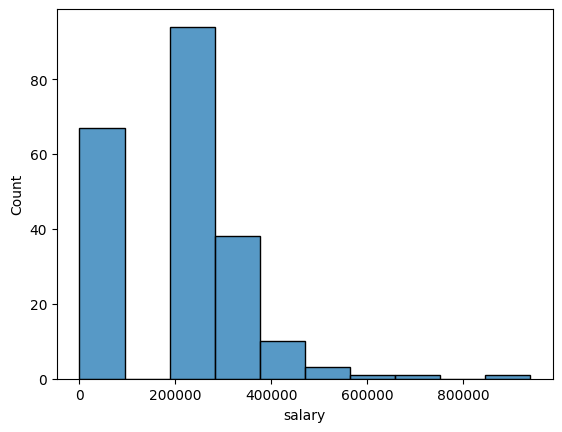

In [22]:
sb.histplot(data=dados, x="salary")

Será que os scores acadêmicos influenciam na contratação? E a experiência de trabalho?

[Text(36.5, 0.5, '')]

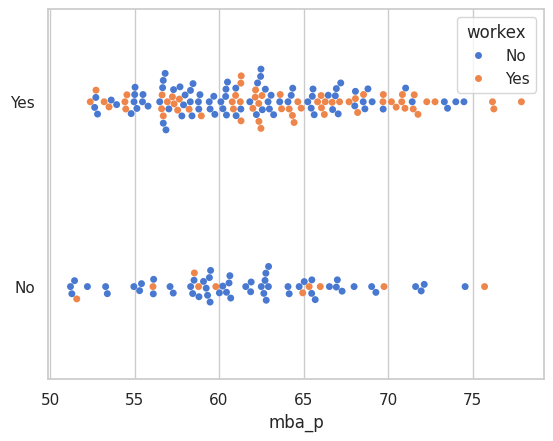

In [24]:
sb.set_theme(style='whitegrid', palette='muted')

ax = sb.swarmplot(data=dados, x='mba_p', y='status', hue='workex')
ax.set(ylabel='')

Inferência dos dados:

Podemos observar que a pontuação de MBA pode influência sim na decisão de contratação, temos um grande concetração de dados sobre profissionais que possuem score de mba_p e com experiência de trabalho.

Existe algum viés de gênero ao oferecer remuneração?

In [25]:
! pip install plotly_express

In [26]:
import plotly_express as px

In [27]:
px.violin(dados,y="salary",x="specialisation",color="gender",box=True,points="all")

Inferência sobre os dados:

Os maiores salários foram dados aos homens.
O salário médio oferecido também foi maior para homens.


Vamos analisar a correlação entre as pontuações de desempenho acadêmico com a contratação:

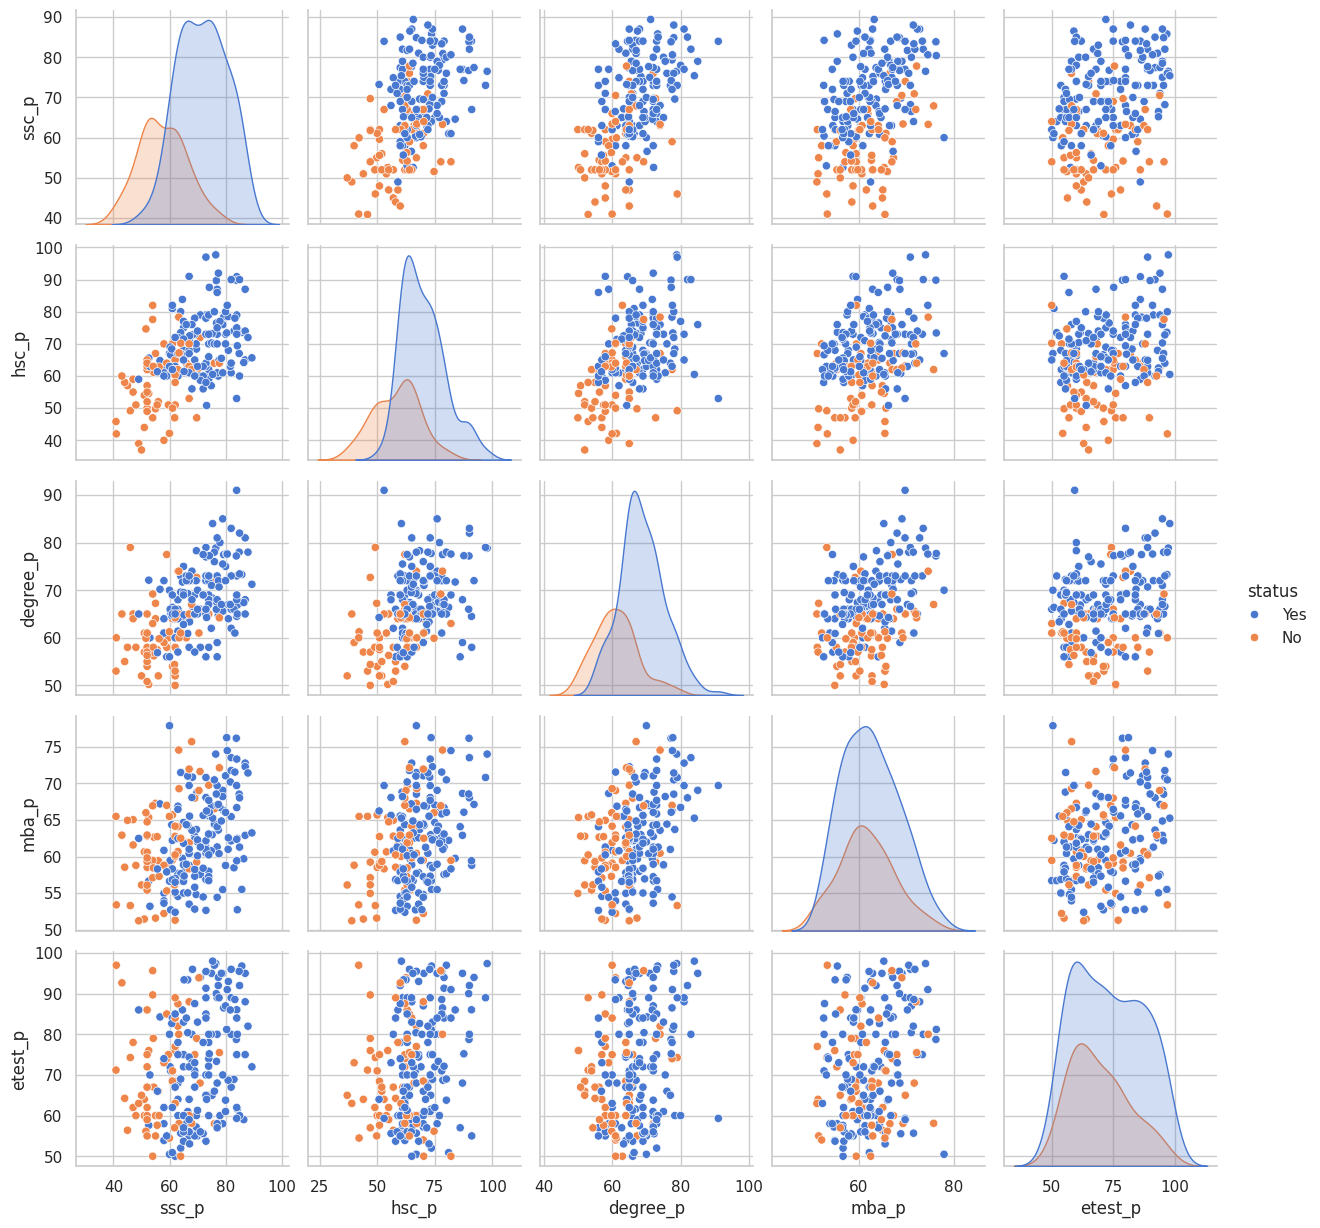

In [30]:
sb.pairplot(dados,vars=['ssc_p','hsc_p','degree_p','mba_p','etest_p'],hue="status")

Inferência sobre os dados:

Candidatos com pontuação alta no ensino médio e na graduação foram contratados.
Quem obteve notas altas em suas escolas foi contratado.

In [31]:
import matplotlib.pyplot as plt
%matplotlib inline

Entendendo as correlações:

In [33]:
import matplotlib.pyplot as plt

<Axes: >

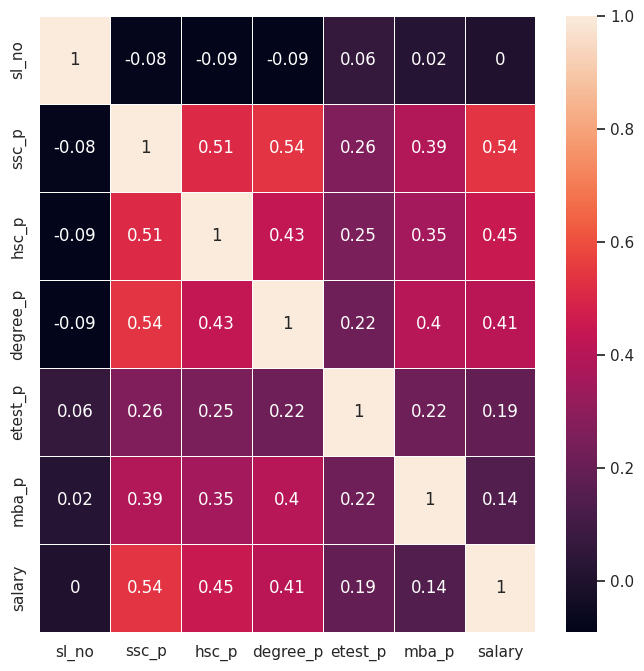

In [35]:
correlation_matrix = dados.corr(numeric_only=True).round(2)

fig, ax = plt.subplots(figsize=(8,8))
sb.heatmap(data=correlation_matrix, annot=True, linewidths=.5, ax=ax)

Aqui somente conseguimos analisar a correlação entre as variáveis numéricas. Será que não seria importante também entender a correlação com as variéveis não numéricas?

Vamos aplicar técnicas de transformação nos dados:


Vamos utilizar label enconder para tratar variáveis categoricas que possuem apenas dois tipos de categorias, como genero, especialização e status.

Para as demais categorias, vamos aplicar a tecnica de one hot enconing.

In [36]:
from sklearn.preprocessing import LabelEncoder

In [37]:
dados.head()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Yes,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Yes,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Yes,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,No,0.0
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Yes,425000.0


In [38]:
colunas=['gender','workex','specialisation','status']

label_encoder = LabelEncoder()
for col in colunas:
    dados[col] = label_encoder.fit_transform(dados[col])
dados.head()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,1,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,0,55.0,1,58.80,1,270000.0
1,2,1,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,1,86.5,0,66.28,1,200000.0
2,3,1,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,0,75.0,0,57.80,1,250000.0
3,4,1,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,0,66.0,1,59.43,0,0.0
4,5,1,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,0,96.8,0,55.50,1,425000.0


Aplicando a técnica de one hot enconding:


In [39]:
dummy_hsc_s=pd.get_dummies(dados['hsc_s'], prefix='dummy')
dummy_degree_t=pd.get_dummies(dados['degree_t'], prefix='dummy')

dados_coeded = pd.concat([dados,dummy_hsc_s,dummy_degree_t],axis=1)
dados_coeded.drop(['hsc_s','degree_t','salary'],axis=1, inplace=True)
dados_coeded.head()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,degree_p,workex,etest_p,specialisation,mba_p,status,dummy_Arts,dummy_Commerce,dummy_Science,dummy_Comm&Mgmt,dummy_Others,dummy_Sci&Tech
0,1,1,67.00,Others,91.00,Others,58.00,0,55.0,1,58.80,1,False,True,False,False,False,True
1,2,1,79.33,Central,78.33,Others,77.48,1,86.5,0,66.28,1,False,False,True,False,False,True
2,3,1,65.00,Central,68.00,Central,64.00,0,75.0,0,57.80,1,True,False,False,True,False,False
3,4,1,56.00,Central,52.00,Central,52.00,0,66.0,1,59.43,0,False,False,True,False,False,True
4,5,1,85.80,Central,73.60,Central,73.30,0,96.8,0,55.50,1,False,True,False,True,False,False


<Axes: >

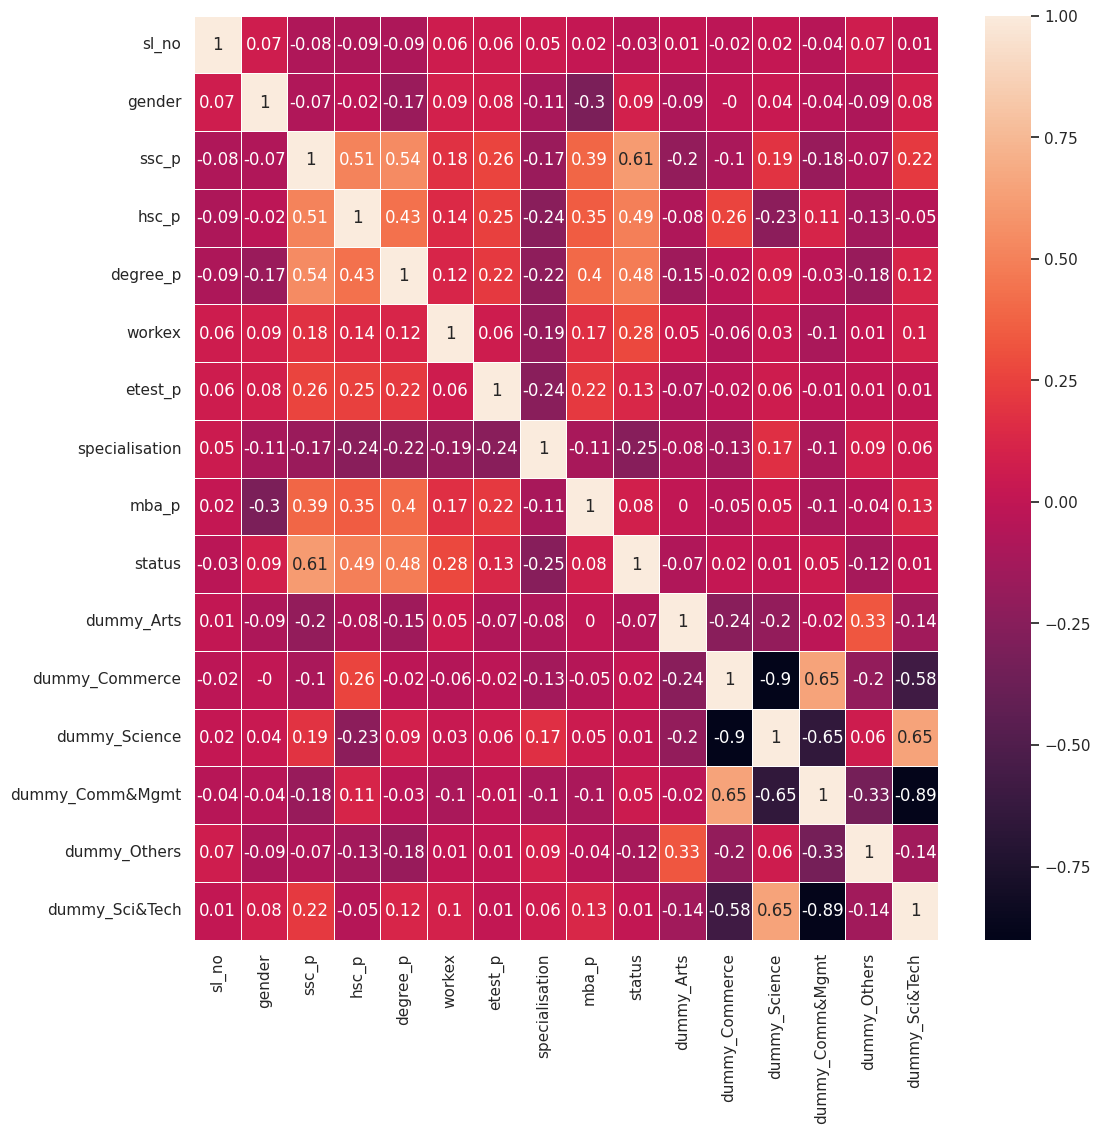

In [41]:
correlation_matrix = dados_coeded.corr(numeric_only=True).round(2)

fig, ax = plt.subplots(figsize=(12,12))
sb.heatmap(data=correlation_matrix, annot=True, linewidths=.5, ax=ax)

Agora, conseguimos analisar as correlações!

Analisando a correlação e a análise de dados, podemos considerar algumas variáveis como possíveis fortes features para nosso modelo de classificação!

Mas lembre-se, correlação não é causalidade!

Analisando algumas variáveis e sua correlação com a variável status, podemos identificar que as variáveis workex, degree_p, hsc_p e ssc_p possuem uma correlação interessante na contratação.

A maior correlação de status de contratação está com o score de ssc_p, ou seja, pessoas com alto score de ssc_p são mais contratadas.

Vamos analisar?


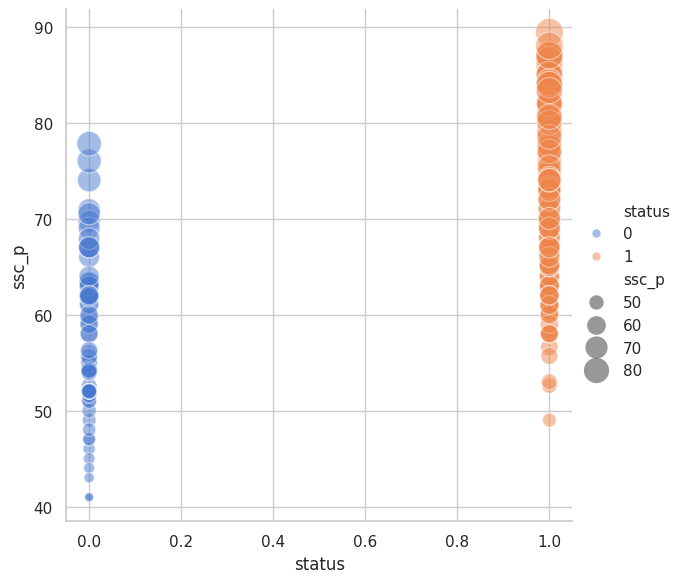

In [42]:
sb.relplot(x="status", y="ssc_p", hue="status", size="ssc_p",
            sizes=(40, 400), alpha=.5, palette="muted",
            height=6, data=dados_coeded)

In [43]:
x = dados_coeded[['ssc_p', 'hsc_p', 'degree_p', 'workex', 'mba_p']] #variaveis independentes
y = dados_coeded['status'] #target

In [44]:
from sklearn.model_selection import train_test_split #separação em treino e teste
from sklearn.neighbors import KNeighborsClassifier   #knn

In [45]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, stratify=y, random_state=7)

In [46]:
x_train.shape

(172, 5)

In [47]:
x_test.shape

(43, 5)

In [48]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [49]:
scaler = StandardScaler()
#scaler = MinMaxScaler()

scaler.fit(x_train)

x_train_escalonado = scaler.transform(x_train)
x_test_escalonado = scaler.transform(x_test)

In [50]:
import numpy as np

In [51]:
error = []

# Calculating error for K values between 1 and 10
for i in range(1, 10): #range de tentativas para k
    knn = KNeighborsClassifier(n_neighbors=i)# aqui definimos  o k
    knn.fit(x_train_escalonado, y_train) #treinando o algoritmo para encontrar o erro
    pred_i = knn.predict(x_test_escalonado) #armazenando as previsões
    error.append(np.mean(pred_i != y_test)) #armazenando o valor do erro médio na lista de erros

Text(0, 0.5, 'Mean Error')

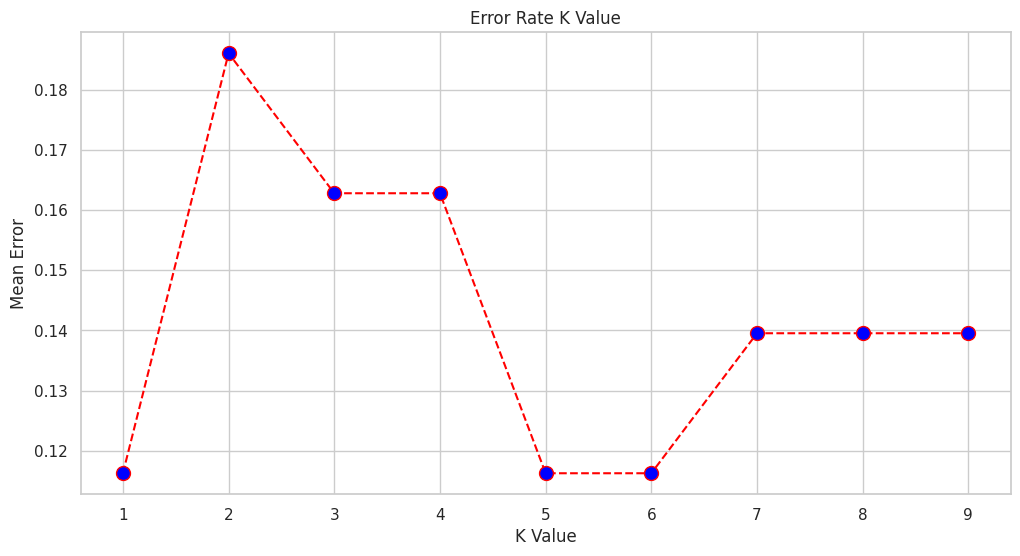

In [52]:
plt.figure(figsize=(12, 6))
plt.plot(range(1, 10), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')

In [ ]:
#!pip install --upgrade scikit-learn

In [53]:
modelo_classificador = KNeighborsClassifier(n_neighbors=5)

modelo_classificador.fit(x_train_escalonado, y_train)

KNeighborsClassifier()

In [54]:
y_predito = modelo_classificador.predict(x_test_escalonado)

In [55]:
y_predito

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1])

In [56]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay # matriz de confusão
from sklearn.metrics import classification_report

In [57]:
from sklearn.metrics import confusion_matrix

<Figure size 1500x500 with 0 Axes>

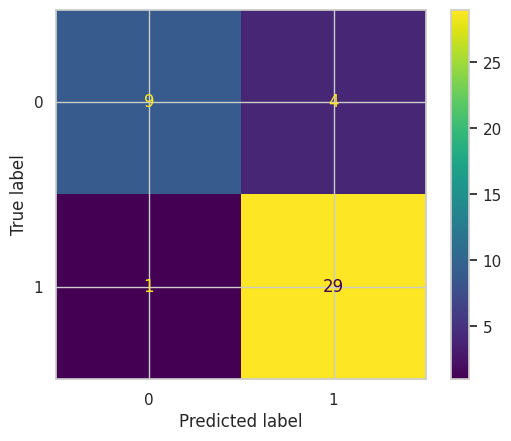

In [58]:
matriz_confusao = confusion_matrix(y_true = y_test,    #dados reais
                                   y_pred = y_predito #dados predito
                                   )

# plotando uma figura com a matriz de confusao
figure = plt.figure(figsize=(15, 5))

disp = ConfusionMatrixDisplay(confusion_matrix = matriz_confusao)

disp.plot(values_format='d')

In [59]:
# Metricas de precisão, revocação, f1-score e acurácia.
print(classification_report(y_test, y_predito)) #relatório de validação das métrica de desempenho.

              precision    recall  f1-score   support

           0       0.90      0.69      0.78        13
           1       0.88      0.97      0.92        30

    accuracy                           0.88        43
   macro avg       0.89      0.83      0.85        43
weighted avg       0.89      0.88      0.88        43



Testando com o modelo SVM:

In [60]:
from sklearn.pipeline import Pipeline
from sklearn.svm import LinearSVC

In [61]:
svm = Pipeline([
    ("linear_svc", LinearSVC(C=1))
])

svm.fit(x_train_escalonado, y_train)

Pipeline(steps=[('linear_svc', LinearSVC(C=1))])

In [62]:
y_predito_svm = svm.predict(x_test_escalonado)

<Figure size 1500x500 with 0 Axes>

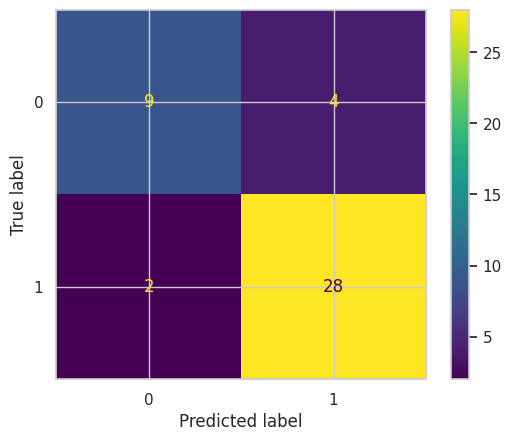

In [63]:
matriz_confusao_svm = confusion_matrix(y_true = y_test,       #dados reais
                                   y_pred = y_predito_svm #dados predito
                                   )

# plotando uma figura com a matriz de confusao
figure = plt.figure(figsize=(15, 5))

disp = ConfusionMatrixDisplay(confusion_matrix = matriz_confusao_svm)

disp.plot(values_format='d')

In [64]:
# Metricas de precisão, revocação, f1-score e acurácia.
print(classification_report(y_test, y_predito_svm)) #relatório de validação das métrica de desempenho.

              precision    recall  f1-score   support

           0       0.82      0.69      0.75        13
           1       0.88      0.93      0.90        30

    accuracy                           0.86        43
   macro avg       0.85      0.81      0.83        43
weighted avg       0.86      0.86      0.86        43



### AUC Score e ROC Curve

In [65]:
from sklearn import metrics
from sklearn.metrics import roc_curve, auc

In [66]:
y_prob = modelo_classificador.predict_proba(x_test_escalonado)[:,1]

In [67]:
false_positive_rate, true_positive_rate, thesholds = roc_curve(y_test, y_prob)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

0.8769230769230769

Text(0.5, 0, 'False Positive Rate')

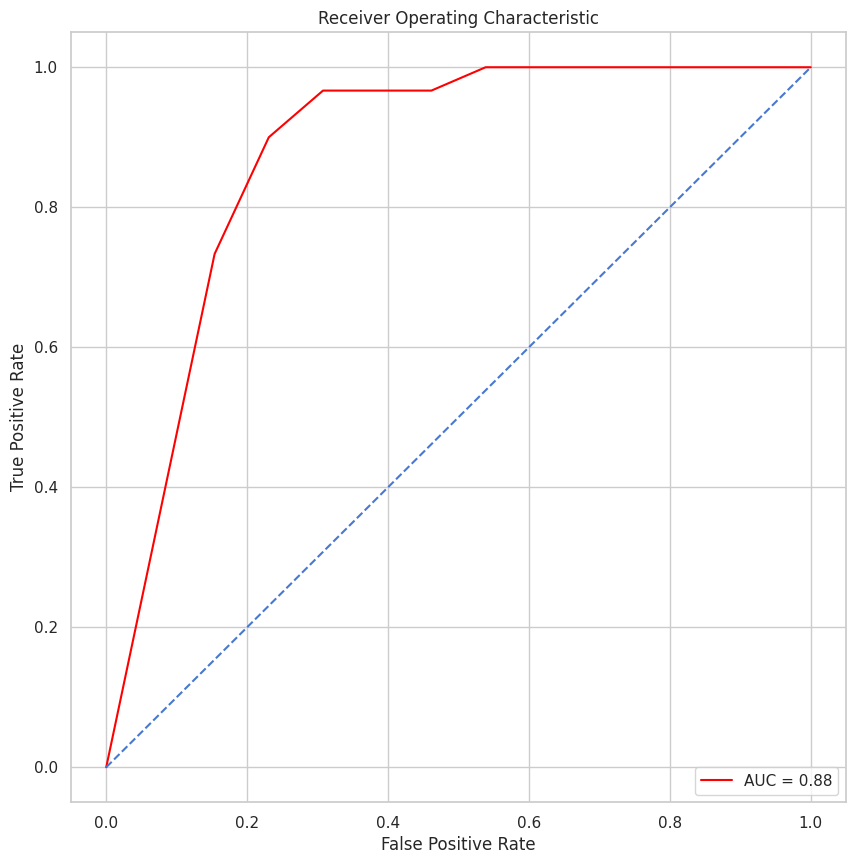

In [70]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 10))
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate, true_positive_rate, color='red', label='AUC = %0.2f' % roc_auc)
plt.legend(loc='lower right')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')